In [ ]:
!pip install transformers datasets evaluate >> /dev/null 2>&1


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Import library
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import defaultdict

import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers

from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


from transformers import AutoTokenizer

from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import re


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Download dataset from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?datasetId=134715 and upload to colab workspace

In [ ]:
!ls -ltrSh 'IMDB Dataset.csv'

-rw-r--r-- 1 root root 64M Aug  9 00:15 'IMDB Dataset.csv'


# **Problem Description**

## **DataSet**

We will use "IMDB Dataset of 50K Movie Reviews" https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews and solve a sentiment analysis deep learning problem.  

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.  

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.


## **Methodology**

One of the main things I would like to do with this dataset and sentiment analysis task is trying and practicing **huggingface transformers** and **transfer learning**, to give everyone some more background on these two concepts:  


### **Huggingface transformers**

Hugging Face Transformers is a popular open-source library developed by Hugging Face, a company focused on Natural Language Processing (NLP) and artificial intelligence. The library is designed to make it easy for researchers and developers to work with various pre-trained language models for a wide range of NLP tasks.

The Hugging Face Transformers library provides a collection of state-of-the-art pre-trained models, including BERT, GPT-2, GPT-3, RoBERTa, and many others. These models can be used for tasks such as text classification, text generation, sentiment analysis, language translation, question-answering, and more.

The key features of Hugging Face Transformers include:

**Pre-trained Models**: The library offers a vast array of pre-trained models that have been trained on large-scale datasets, enabling users to leverage the knowledge from these pre-trained models and fine-tune them for their specific NLP tasks.

**Easy Integration**: Hugging Face Transformers provides a simple and consistent API, making it effortless to use various pre-trained models and incorporate them into NLP pipelines or applications.

**Model Fine-tuning**: Researchers and developers can fine-tune the pre-trained models on their own datasets to adapt them for specific tasks, achieving better performance on domain-specific problems.

**Model Hub**: Hugging Face offers a model hub where users can find and share pre-trained models and community-contributed models for various languages and tasks.

Support for Multiple Frameworks **bold text**: The library supports popular deep learning frameworks like PyTorch and TensorFlow, allowing users to work with their preferred framework.

Hugging Face Transformers has been widely adopted in the NLP community due to its ease of use, performance, and active development, which has helped advance research and applications in the field of Natural Language Processing.

### **Transfer learning**

We had learned this concept briefly during the course, specifically Transfer learning using transformers involves taking a pre-trained language model, which has been trained on a large corpus of text, and fine-tuning it on a specific task or dataset of interest. The idea is that the language model has already learned useful linguistic representations during its pre-training phase, and this knowledge can be leveraged to improve performance on downstream tasks with relatively less data and training time.

Here's a general outline of how to perform transfer learning using transformers:

**Choose a Pre-trained Model**: First, select a pre-trained transformer model from the Hugging Face Transformers library that best matches your task and dataset. For example, if you are working on text classification, you might use models like BERT, RoBERTa, or GPT-2.

**Prepare Data**: Organize your task-specific dataset into appropriate input format required by the chosen transformer model. For most models, this would involve tokenizing the text data, converting it into input features, and creating data loaders.

**Define Task-Specific Head**: For transfer learning, you need to replace the original task-specific head (classifier/regressor) of the pre-trained model with a new one that fits your specific task. The original head was used during pre-training for language modeling and may not be suitable for your task.

**Fine-Tuning**: Now, you can start the fine-tuning process. During fine-tuning, you feed your task-specific data into the modified pre-trained model and update the model's parameters using your dataset. The idea is to allow the model to adjust its weights based on the specific patterns and information present in your data.

**Training Parameters**: Fine-tuning typically requires a lower learning rate compared to pre-training, as the model is already knowledgeable and only needs to adapt to the new task. You might need to experiment with different learning rates, batch sizes, and other hyperparameters to achieve the best results.

**Evaluation**: After training the model on your task-specific data for a certain number of epochs, evaluate its performance on a validation or test dataset. This will help you monitor the model's progress and decide when to stop training.

**Inference**: Once the model is fine-tuned and evaluated, you can use it to make predictions on new, unseen data for your task.

It's essential to remember that transfer learning success depends on having a pre-trained model that is relevant to your task and a dataset large enough to capture the nuances of the specific problem. Also, consider the computational resources required for training, as fine-tuning a large transformer model can be computationally expensive.

Hugging Face Transformers provides convenient APIs and pre-built components to help with the fine-tuning process, making it easier to incorporate transfer learning into your NLP projects.

**We will also compare the performance with basic CNN using keras library**

# **EDA**

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

## **Count of good and bad reviews**

Total Counts of both sets positive    25000
negative    25000
Name: sentiment, dtype: int64


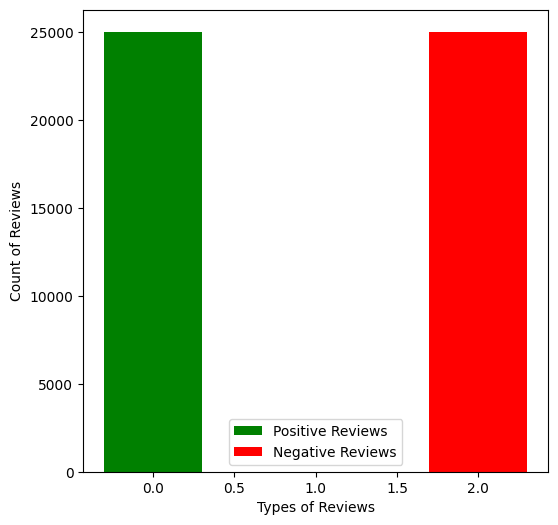

In [ ]:
count=df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()

count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

We can see it is a balanced dataset

## **Count of words for each sentiment**

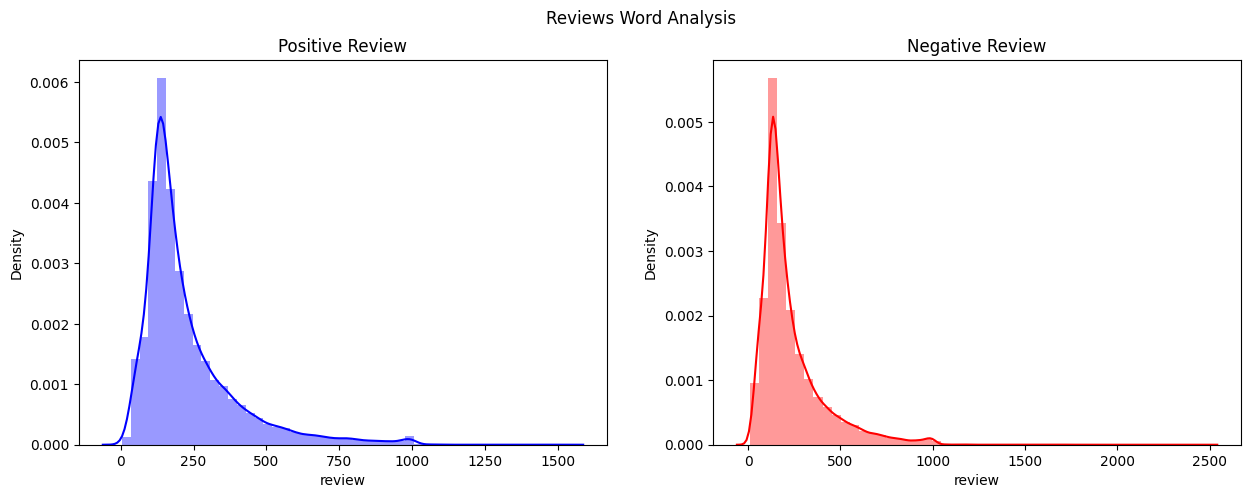

In [ ]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()


count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")



## **Count of stop words for each sentiment**

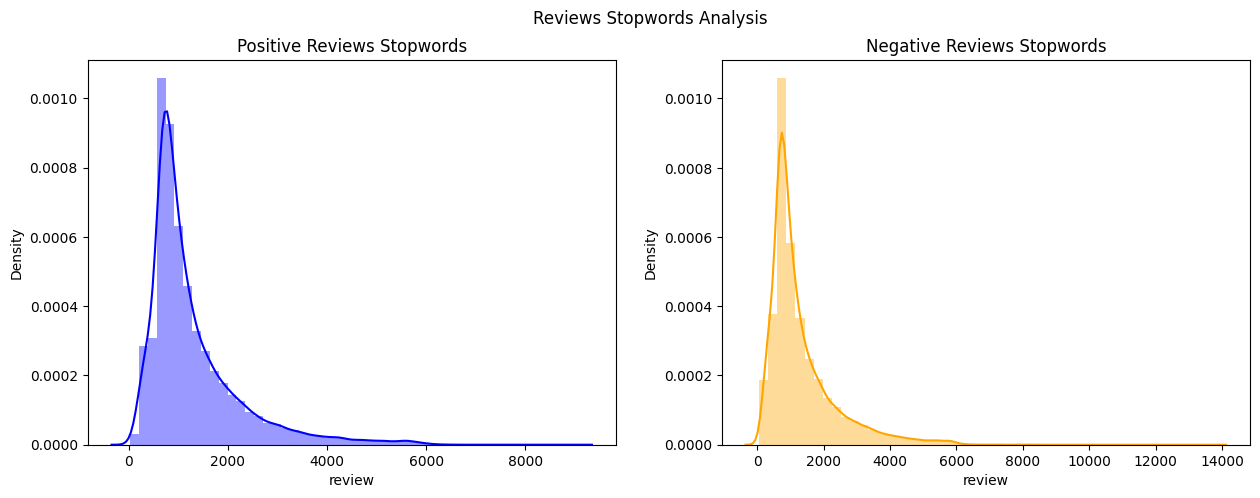

In [ ]:
def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()


stops=set(stopwords.words('english'))
count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

## **WordCloud**

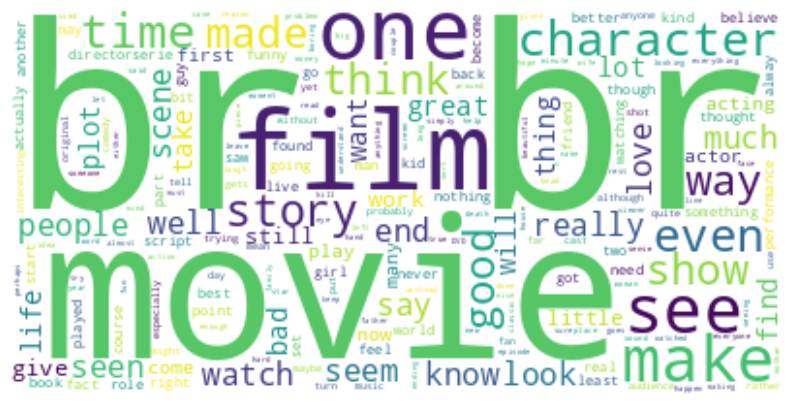

In [ ]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image
def display_cloud(data,color):
    plt.subplots(figsize=(10,10))
    wc = WordCloud(stopwords=STOPWORDS,
                   background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

display_cloud(df['review'],'red')

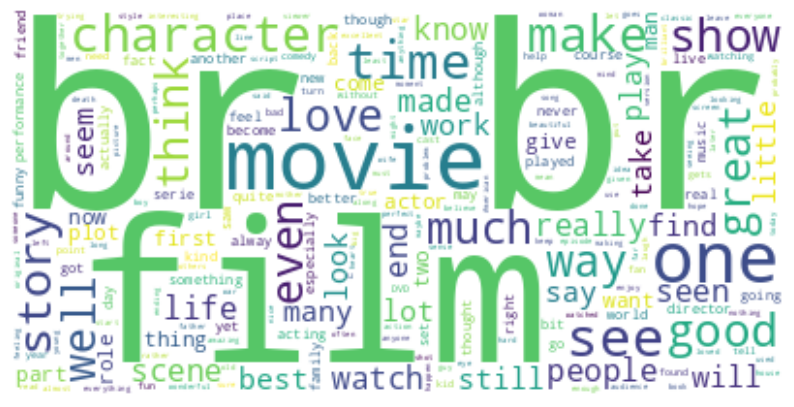

In [ ]:
#Wordlcouds for good reviews
display_cloud( count_good['review'],'blue')

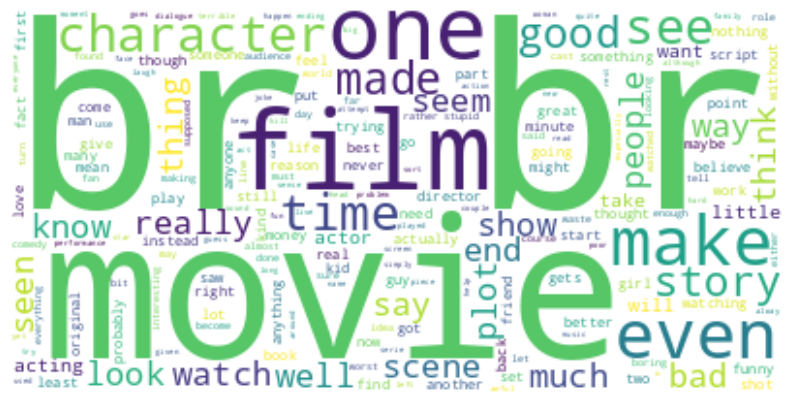

In [ ]:
#Wordlcouds for bad reviews
display_cloud( count_bad['review'],'blue')

**The difference of wordcloud between good and bad reviews are not that obvious at first glance**

## **WordCounter**

<Axes: >

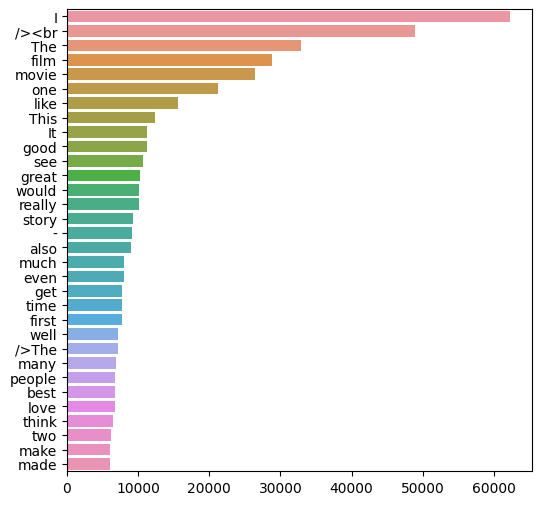

In [ ]:
def create_corpus(word):
    corpus=[]

    for x in df[df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

## **Bi-gram and Tri-gram analysis**

Bi-gram and tri-gram analysis is a text analysis technique used to extract and study consecutive sequences of two (bi-grams) or three (tri-grams) words from a given text or dataset. These n-grams are essentially overlapping sets of words in a specific order.

1. Bi-gram Analysis:
A bi-gram is a sequence of two consecutive words that occur together in a text. For example, in the sentence "The quick brown fox jumps over the lazy dog," some of the bi-grams are "The quick," "quick brown," "brown fox," "fox jumps," "jumps over," "over the," "the lazy," and "lazy dog."

Bi-gram analysis helps in understanding the relationships between adjacent words and identifying common phrases or expressions that appear frequently in the text. This analysis is used in various natural language processing (NLP) tasks such as language modeling, sentiment analysis, and information retrieval.

2. Tri-gram Analysis:
A tri-gram is a sequence of three consecutive words that occur together in a text. Continuing from the example sentence above, some of the tri-grams would be "The quick brown," "quick brown fox," "brown fox jumps," "fox jumps over," "jumps over the," "over the lazy," and "the lazy dog."

Tri-gram analysis provides more context than bi-grams and can reveal more complex patterns and language structures. It is often used in tasks like part-of-speech tagging, text classification, and machine translation.

Why is it useful?
Bi-gram and tri-gram analysis are useful for several reasons:

Language Modeling: N-grams are used to build language models that predict the probability of a word given its previous n-1 words. These models are fundamental in many NLP applications.

Information Retrieval: In search engines, tri-grams are commonly used to index and search for phrases or multi-word queries efficiently.

Sentiment Analysis: Identifying frequent bi-grams and tri-grams can help uncover common sentiments and expressions used in positive or negative reviews.

Pattern Recognition: Bi-grams and tri-grams are used in various pattern recognition tasks, such as identifying product names, entities, or specific phrases.

Feature Extraction: In machine learning tasks, n-grams can be used as features for text classification and other applications.

Overall, bi-gram and tri-gram analysis provide valuable insights into the structure and patterns of text data, enabling researchers and data analysts to gain a deeper understanding of the underlying content.

ALL MOVIES


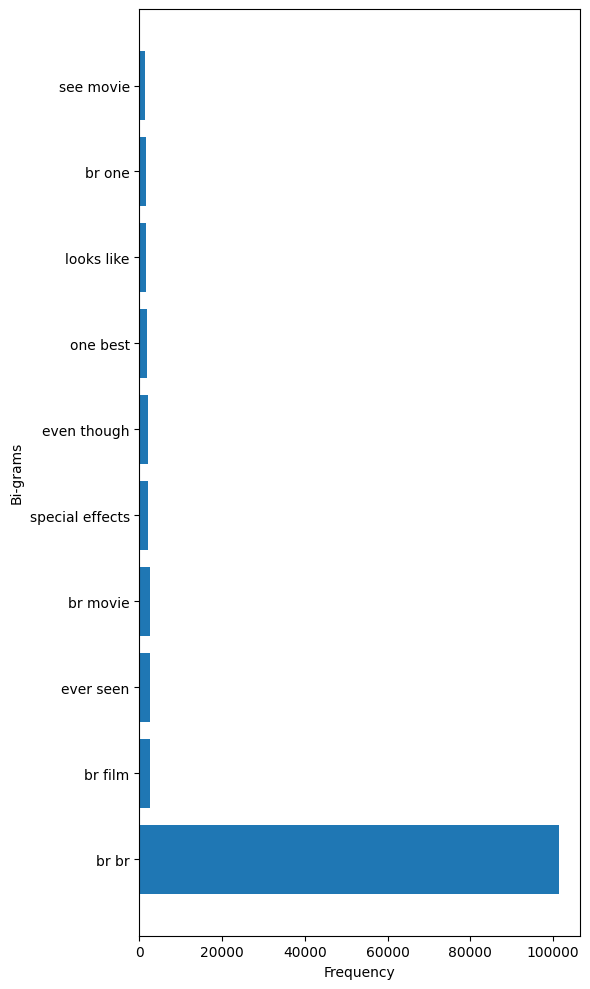

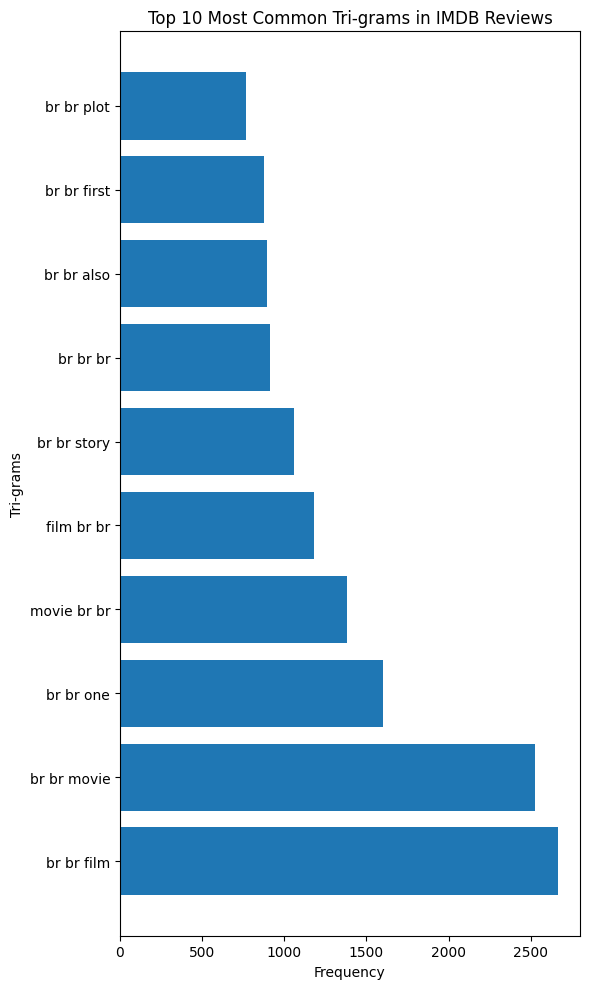

MOVIESS WITH POSITIVE SENTIMENT


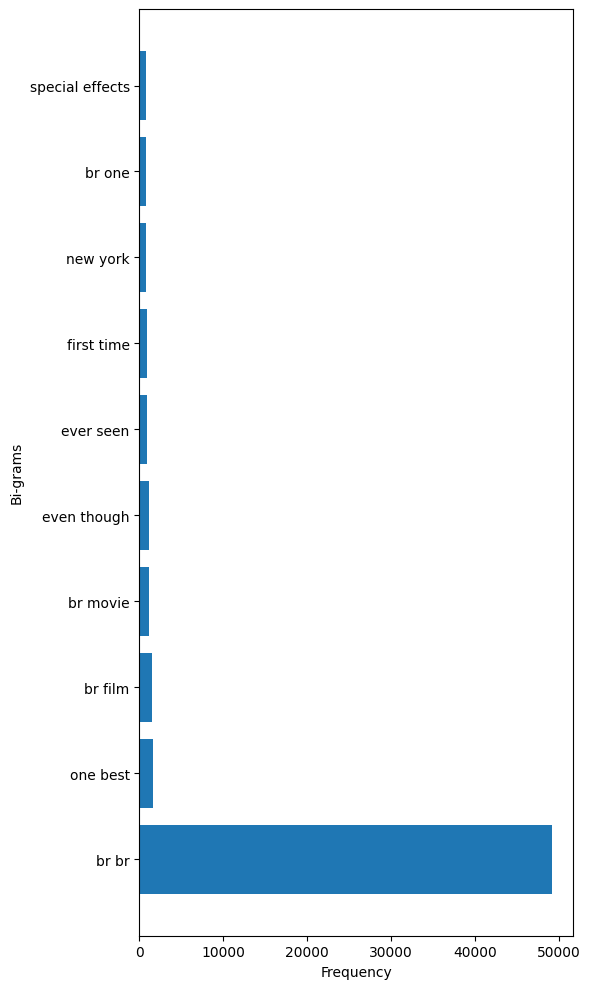

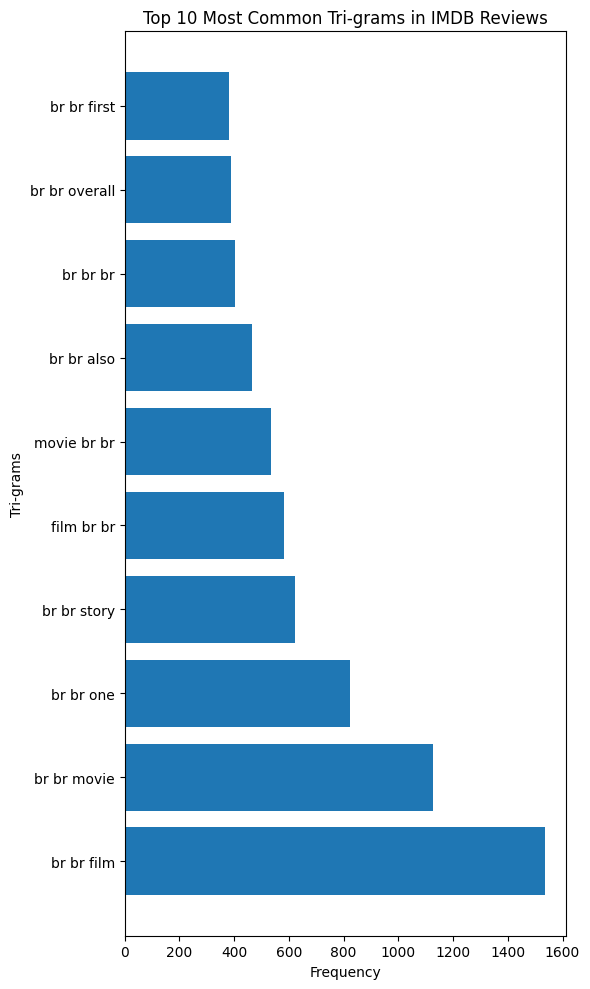

MOVIESS WITH NEGATIVE SENTIMENT


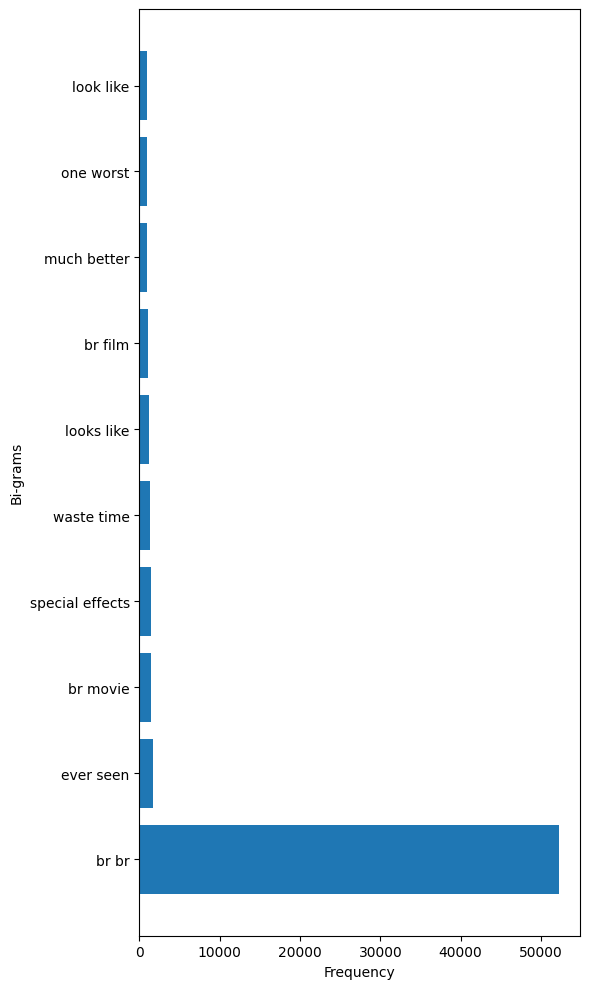

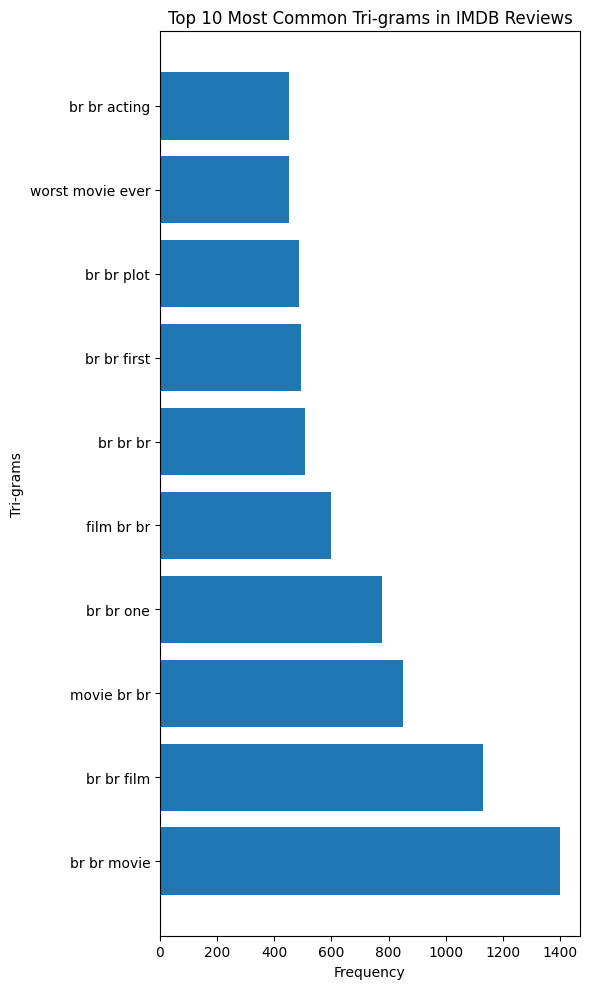

In [ ]:
# Preprocess function to clean and tokenize the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token.isalpha() and token not in stop_words]


def count_and_draw_ngrams(df, top_n):
    # Initialize lists to store bi-grams and tri-grams
    all_bi_grams = []
    all_tri_grams = []

    # Loop through each review text and create bi-grams and tri-grams
    for review_text in df['review']:
        tokens = preprocess_text(review_text)
        bi_grams = list(ngrams(tokens, 2))
        tri_grams = list(ngrams(tokens, 3))
        all_bi_grams.extend(bi_grams)
        all_tri_grams.extend(tri_grams)

    # Count the frequency of each bi-gram and tri-gram
    bi_gram_freq = Counter(all_bi_grams)
    tri_gram_freq = Counter(all_tri_grams)

    # Get the most common bi-grams and tri-grams
    most_common_bi_grams = bi_gram_freq.most_common(top_n)
    most_common_tri_grams = tri_gram_freq.most_common(top_n)

    # Convert the data to lists for plotting
    bi_gram_labels, bi_gram_counts = zip(*most_common_bi_grams)
    tri_gram_labels, tri_gram_counts = zip(*most_common_tri_grams)
    bi_gram_labels = [' '.join(gram) for gram in bi_gram_labels]  # Convert tuples to strings
    tri_gram_labels = [' '.join(gram) for gram in tri_gram_labels]  # Convert tuples to strings

    # Plot bi-grams
    plt.figure(figsize=(6, 10))
    plt.barh(bi_gram_labels, bi_gram_counts)
    plt.ylabel('Bi-grams')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Plot tri-grams
    plt.figure(figsize=(6, 10))
    plt.barh(tri_gram_labels, tri_gram_counts)
    plt.ylabel('Tri-grams')
    plt.xlabel('Frequency')
    plt.title('Top 10 Most Common Tri-grams in IMDB Reviews')
    plt.tight_layout()
    plt.show()

print("ALL MOVIES")
count_and_draw_ngrams(df, 10)
print("MOVIESS WITH POSITIVE SENTIMENT")
count_and_draw_ngrams(count_good, 10)
print("MOVIESS WITH NEGATIVE SENTIMENT")
count_and_draw_ngrams(count_bad, 10)

The following can be inferred from the data:

1. The dataset is balanced.
2. The dataset contains equal number of semantics for reviews of both polarity.
3. The dataset contains redundant words and html syntaxes.
4. Punctuations/stopwords are present in a equal distribution in the dataset.

So we need text cleaning work to be done


# **Data cleaning and transformation**

## **Data cleaning**

* HTML codes
* URLs
* Emojis
* Stopwords
* Punctuations
* Expanding Abbreviations

In [ ]:
# before cleaning up
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Removes  <br />
def remove_br(data):
  data = re.sub(r"<br />", " ", data)
  return data

#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data



In [ ]:
df['review']= df['review'].apply(lambda z: remove_br(z))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming t...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review']= df['review'].apply(lambda z: remove_punctuations(z))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [ ]:
df['review']= df['review'].apply(lambda z: remove_html(z))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [ ]:
df['review']= df['review'].apply(lambda z: remove_url(z))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [ ]:
df['review']= df['review'].apply(lambda z: remove_emoji(z))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [ ]:
## replacing some abbreviated pronouns with full forms (example:"you've"->you have")
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)
    return data



In [ ]:
df['review'] = df['review'].apply(lambda z: remove_abb(z))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


Now lets re-draw some graphs before the data cleaning

In [ ]:
count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']

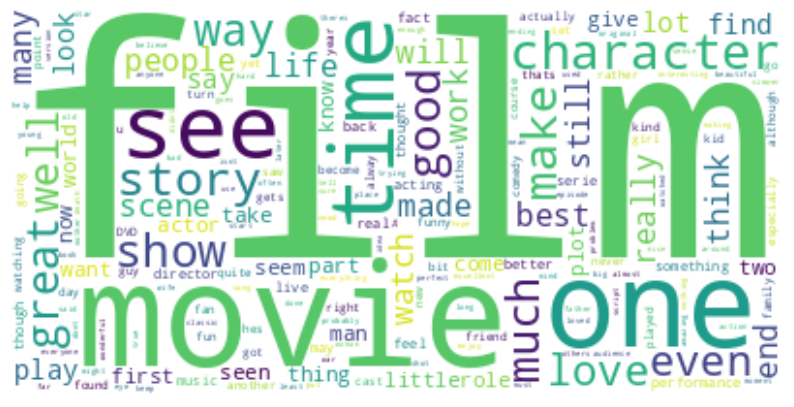

In [ ]:
display_cloud( count_good['review'],'blue')

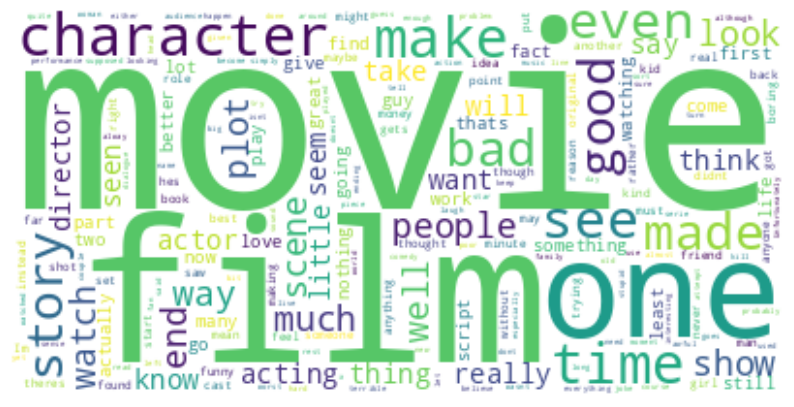

In [ ]:
display_cloud( count_bad['review'],'blue')

MOVIESS WITH POSITIVE SENTIMENT


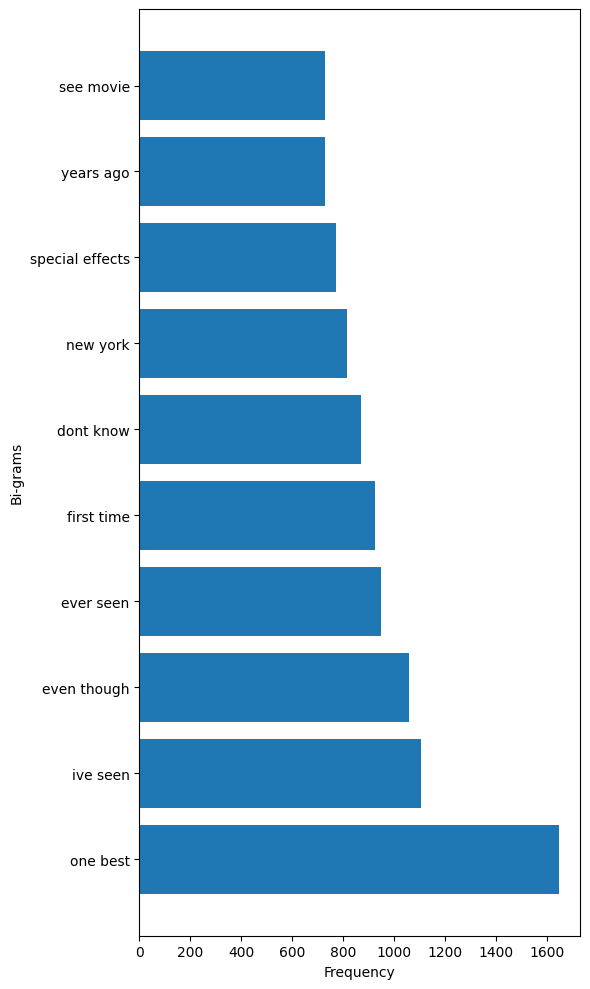

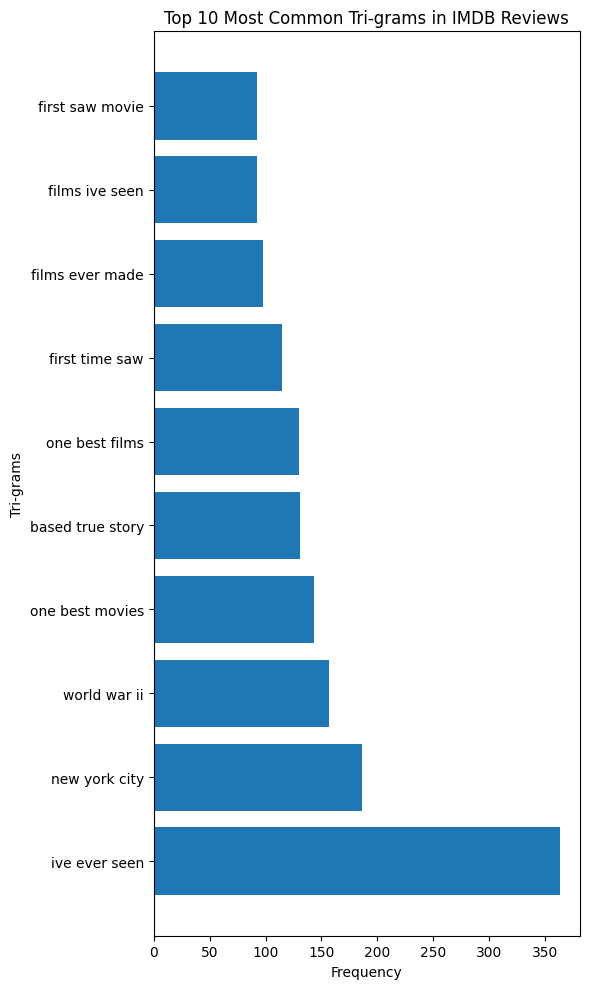

MOVIESS WITH NEGATIVE SENTIMENT


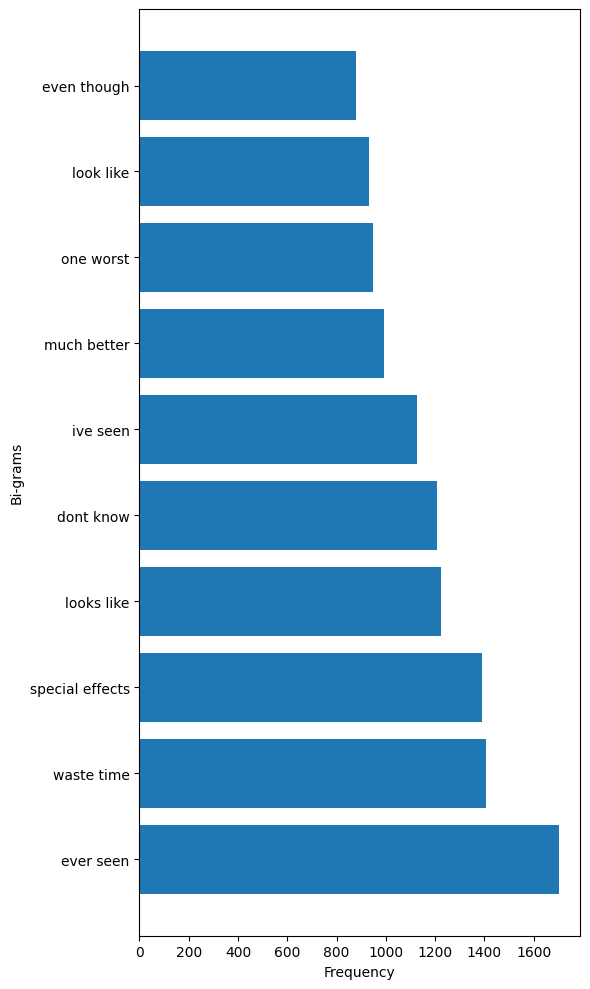

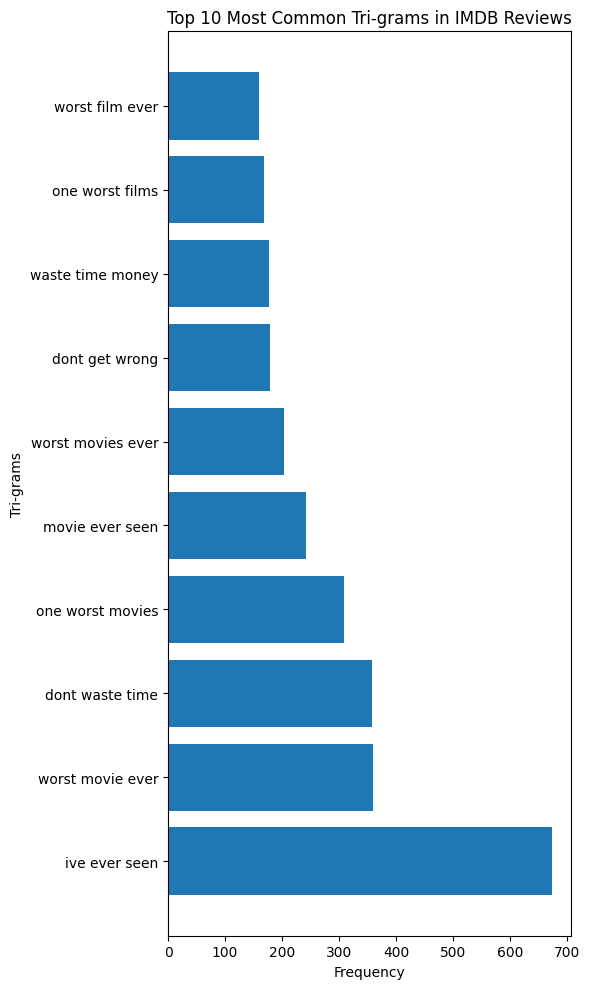

In [ ]:
print("MOVIESS WITH POSITIVE SENTIMENT")
count_and_draw_ngrams(count_good, 10)
print("MOVIESS WITH NEGATIVE SENTIMENT")
count_and_draw_ngrams(count_bad, 10)

**Now we can see some clear difference of good/bad words**




## **Transformation**

Once the data is cleaned , we can again prune some words to their base form and reduce the sentence lengths. This is important because when we are applying any model (statistical, deep learning, transformers,graphs), 2 different words from the same base word are encoded and tokenized in a different manner. For instance, the word "watched" and "watching" have the same root word "watch", however they are encoded separately with respect to any Tokenizer.  

To alleviate this issue, it is recommended to perform lemmatization on the text corpus so that the words can be reduced to their root semantic word. Morphological transformations such as "watched" and "watching", are converted to their base form through this method.

Lemmatization is a natural language processing technique used to reduce words to their base or root form, known as the "lemma." The lemma is the canonical or dictionary form of a word, typically the form found in the dictionary.

Lemmatization is different from stemming, another text normalization technique. While stemming chops off word endings to obtain a common base form, lemmatization transforms words using vocabulary and morphological analysis to generate the base form. This ensures that the lemmatized word is a valid word that can be found in a dictionary, making it more linguistically accurate than stemming.

For example, consider the following words:

Lemmatization:

Lemmatizing "running" would result in "run."
Lemmatizing "better" would result in "good."
Stemming:

Stemming "running" might result in "run."
Stemming "better" could become "better" (no change).
Lemmatization is useful for various natural language processing tasks, such as text classification, sentiment analysis, information retrieval, and more. By reducing words to their base form, lemmatization can help improve the accuracy of text processing tasks, reduce data dimensionality, and enhance the understanding of the underlying meaning of the text.

In [ ]:
def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

df['review']=df['review'].apply(lambda z: lemma_traincorpus(z))
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


At this stage , we have covered the dataset preparation part of the pipeline. At this stage we have analysed the dataset , got an initial estimate about the words in the corpus. We performed cleaning, statistical analysis as well as lemmatization to prepare the dataset for EDA and successive steps.

# **Vectorization and Embeddings**

## **Vectorization**

In this context, we will be vectorizing our dataset. This would allow us to convert our data to higher dimensional containers (matrices). These vectorization strategies allow the word corpus to be properly suitable for advanced semantic analysis.

Here there are 2 variants of transforming the textual corpus to a numerical vector:

* Vectorize without semantics
* Retain Semantic Importance   

In the first case, vectorization strategy is used to provide a co-occurence probabilistic distribution for vectorization. Methods like TF-IDF,Count vectorization/One hot vectorization, falls under this criteria.These methods leverage statistical co-occurence probabilities and log likelihoods for determining the frequently occuring sentences or group of words in a corpus.

The second case, relies on applying vectors with respect to semantic importance. Embeddings fall under this category. Embeddings are largely of 2 kinds

* Static Embeddings: Word2Vec, Glove, Fasttext, Paragram
* Dynamic Embeddings: ELMO, BERT & its variants, XLNet/Transformer-XL  

All of these embeddings rely on pretrained word vectors where a probabilistic score is attributed to each word in the corpus. These probabilities are plotted in a low dimensional plane and the "meaning" of the words are inferred from these vectors. Generally speaking cosine distance is taken as the major metric of similarity measurement between word and sentence vectors to infer similarity.

**In week 4 homework, I used Glove, here I will try Word2Vec**

Word2Vec is one of the traditional algorithms which was emphasized based on Heirarchical Softmax as well as with simplistic RNNs. Gensim provides a great way to use and start with Word2Vec. The Word2Vec algorithm builds by using the Skipgram model as well as the Common Bag of Words Model.

**Convert Input DataFrame to a List**  
It is helpful for us to investigate individual word embeddings or sentence embeddings. Differentiating the individual rows of text makes it easier to pass into static and dynamic embedding models.

In [ ]:
check_df=list(df['review'].str.split())


In [ ]:
type(check_df)

list

In [ ]:
print(check_df[0])

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'youll', 'be', 'hooked', 'They', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', 'Trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'Its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'on', 'Emerald', 'City', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', '

In [ ]:
# Tokenize the reviews
tokenized_reviews = [word_tokenize(review) for review in df['review']]
type(tokenized_reviews)

list

In [ ]:
print(tokenized_reviews[0])

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', 'youll', 'be', 'hooked', 'They', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', 'Trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'Its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'on', 'Emerald', 'City', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cells', '

In [ ]:
%%time
## Load word2vec algorithm from gensim
from gensim.models import Word2Vec,KeyedVectors

model=Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=0)


CPU times: user 2min 38s, sys: 813 ms, total: 2min 39s
Wall time: 1min


In [ ]:
# Accessing the vocabulary and indices
vocab = list(model.wv.key_to_index.keys())  # List of words in the vocabulary
indices = list(model.wv.key_to_index.values())  # List of corresponding word indices


In [ ]:
# Getting a word vector for a specific word
word = "classic"
word_index = model.wv.key_to_index[word]
word_vector = model.wv[word]

In [ ]:
print(word_index)
print(word_vector)

365
[-3.274535    0.54378825  1.1370506  -0.459333   -0.94675696 -1.8503739
  2.2051265  -1.2782013  -0.5588038  -1.5651206  -0.97463876 -0.10478618
  1.8517323  -0.68240774 -0.7416492   0.11746734  1.8407052  -0.19552884
  0.728291   -0.49502993  1.9481739   2.8087904   3.3997362  -0.18134753
 -0.17699067 -0.47762087  0.25027382  2.2098045   0.8568176  -0.85779464
  1.3391773   0.28090954  1.0794513  -0.3309454   1.5831226   1.3357638
 -0.13016249 -0.06802276  1.3529462   1.0030892   1.1384217  -1.5150898
  0.50906366 -2.4719968   0.7148663  -0.8109166   0.1827264  -1.3773446
  1.0447596  -0.12203769 -0.88911474 -0.9136472  -1.7633097  -0.9919426
 -1.7737406   2.2593684   0.47421506 -0.3494696  -0.87613755 -1.4841977
 -0.06125511 -1.6767395  -0.45465675  0.8959031   1.2509245  -1.5116953
 -0.97914577  0.11951937  3.3060427  -0.14832138  3.57679     1.3029872
  1.5644727   2.242781   -1.6373229   1.3989303   1.1346704  -0.67809945
 -1.1532714   2.587523   -0.04133572  1.6968325   0.198

In [ ]:
##save the modeled words produced from Word2Vec
model.save('word2vec_model.bin')
loaded_model=KeyedVectors.load('word2vec_model.bin')
print(loaded_model)

Word2Vec<vocab=198441, vector_size=100, alpha=0.025>


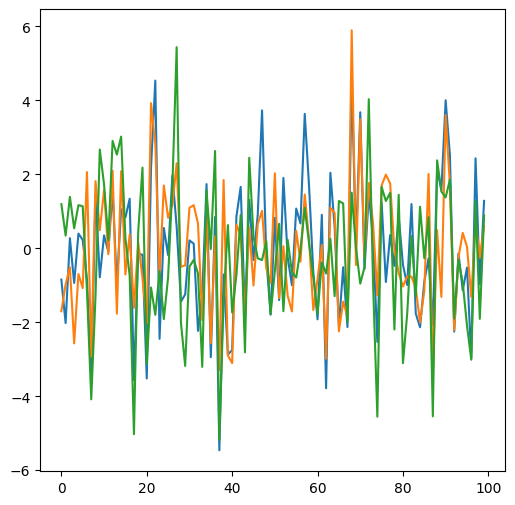

In [ ]:
#Visualize the Word Vectors
plt.plot(loaded_model.wv['good'])
plt.plot(loaded_model.wv['great'])
plt.plot(loaded_model.wv['well'])

plt.show()

## **Embedding**

An embedding matrix is a representation of words in a numerical form that's suitable for input to machine learning models, particularly those that process text data. It's used to convert words from their textual form (strings) into a format that machine learning algorithms can work with, which is usually vectors of real numbers. The embedding matrix contains a row for each word in the vocabulary, and each row corresponds to the word's vector representation.

In natural language processing (NLP), word embeddings are crucial for representing the semantic meaning of words in a continuous vector space. This allows words with similar meanings to have similar vector representations. Embedding matrices help capture relationships between words, such as synonyms, antonyms, or words that appear in similar contexts.

Here's how the process of creating an embedding matrix works:

1. Word2Vec or Other Embedding Method: You first train a word embedding model (such as Word2Vec) on a large corpus of text. These models learn to represent words in a dense vector space, where words with similar meanings are closer to each other.

2. Vocabulary Index: You create a vocabulary index that maps each word in the corpus to a unique integer index. This index is used to locate the corresponding vector in the embedding matrix.

3. Populating the Embedding Matrix: For each word in the vocabulary, you look up its vector representation from the trained word embedding model. These vectors are then arranged row by row to form the embedding matrix. If a word is not in the vocabulary (i.e., not seen during training), you might use a special token like <UNK> (unknown) or assign a random vector.

4. Input to Models: The embedding matrix is used as the initial weights for the embedding layer in machine learning models. In NLP tasks like text classification or sentiment analysis, the embedding layer takes sequences of word indices as input and replaces each index with the corresponding vector from the embedding matrix.

The embedding matrix helps the model understand relationships between words and captures the semantic meaning of words, making it an essential component in many NLP applications.

In [ ]:
df["sentiment"] = (df["sentiment"]=="positive").astype("int8")
sentiments = df["sentiment"].values


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming te...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


In [ ]:
reviews = df.review.values.tolist()

In [ ]:
type(reviews)

list

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
vocab_size = len(tokenizer.word_index) + 1
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences to a fixed length
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Maximum sequence length
max_length = 100
# Generate embedding matrix
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]

In [ ]:
embedding_matrix


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.91078544, -1.66193211,  2.01496387, ...,  1.64544868,
        -1.18683064,  0.83962917],
       [-0.25837091, -1.66385424, -0.50136662, ...,  1.00248408,
         0.06371016, -0.29624897],
       ...,
       [-0.00766833,  0.01601776,  0.02686309, ...,  0.02258907,
         0.0041789 , -0.02246778],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01083096, -0.00347583, -0.02587336, ...,  0.00414652,
        -0.00448481, -0.03077239]])

# **Modelling and Tuning**

In [ ]:

def plot_hist(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)


## **Basic LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,GRU,Flatten,Dropout,SpatialDropout1D
from keras.initializers import Constant
from keras.layers.convolutional import Conv1D,MaxPooling1D

model_basic = Sequential()
model_basic.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))
# Add SpatialDropout1D to prevent overfitting
model_basic.add(SpatialDropout1D(0.2))

# Add an LSTM layer
model_basic.add(LSTM(100))

# Add a Dense layer
model_basic.add(Dense(1, activation='sigmoid'))

model_basic.compile(loss="binary_crossentropy",optimizer = "adam",metrics=['accuracy'])

In [ ]:
model_basic.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          16803100  
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 16,883,601
Trainable params: 80,501
Non-trainable params: 16,803,100
_________________________________________________________________


In [ ]:

history_basic = model_basic.fit(X_train, y_train,batch_size=64,epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
625/625 [==============================] - 14s 9ms/step - loss: 0.4565 - accuracy: 0.7821 - val_loss: 0.3543 - val_accuracy: 0.8470
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3538 - accuracy: 0.8444 - val_loss: 0.3216 - val_accuracy: 0.8569
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3247 - accuracy: 0.8583 - val_loss: 0.2954 - val_accuracy: 0.8699
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3023 - accuracy: 0.8707 - val_loss: 0.2874 - val_accuracy: 0.8728
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2858 - accuracy: 0.8803 - val_loss: 0.2867 - val_accuracy: 0.8764
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2738 - accuracy: 0.8849 - val_loss: 0.2840 - val_accuracy: 0.8762
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2578 - accuracy: 0.8914 - val_loss: 0.2846 - val_accuracy: 0.8765
Epoch

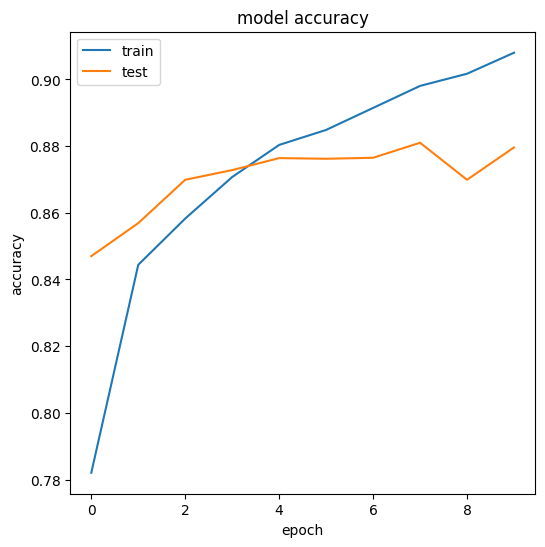

In [ ]:
plot_hist(history_basic)


## **LSTM - variation 1**
* Add additional Dense layer with relu activation
* Adjust LSTM layer with dropout

In [ ]:
model_1 = Sequential()
model_1.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))
# Add SpatialDropout1D to prevent overfitting
model_1.add(SpatialDropout1D(0.2))

# Add an LSTM layer
model_1.add(LSTM(32,dropout=0.2,recurrent_dropout=0.2))

model_1.add(Dense(32,activation="relu"))
# Add a Dense layer
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss="binary_crossentropy",optimizer = "adam",metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train,batch_size=64,epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
625/625 [==============================] - 105s 162ms/step - loss: 0.5500 - accuracy: 0.7086 - val_loss: 0.4005 - val_accuracy: 0.8253
Epoch 2/10
625/625 [==============================] - 100s 160ms/step - loss: 0.4278 - accuracy: 0.8064 - val_loss: 0.3531 - val_accuracy: 0.8433
Epoch 3/10
625/625 [==============================] - 99s 158ms/step - loss: 0.3896 - accuracy: 0.8245 - val_loss: 0.3351 - val_accuracy: 0.8523
Epoch 4/10
625/625 [==============================] - 99s 159ms/step - loss: 0.3705 - accuracy: 0.8349 - val_loss: 0.3191 - val_accuracy: 0.8613
Epoch 5/10
625/625 [==============================] - 98s 157ms/step - loss: 0.3599 - accuracy: 0.8396 - val_loss: 0.3189 - val_accuracy: 0.8613
Epoch 6/10
625/625 [==============================] - 100s 160ms/step - loss: 0.3518 - accuracy: 0.8456 - val_loss: 0.3190 - val_accuracy: 0.8607
Epoch 7/10
625/625 [==============================] - 100s 160ms/step - loss: 0.3447 - accuracy: 0.8479 - val_loss: 0.3044 - va

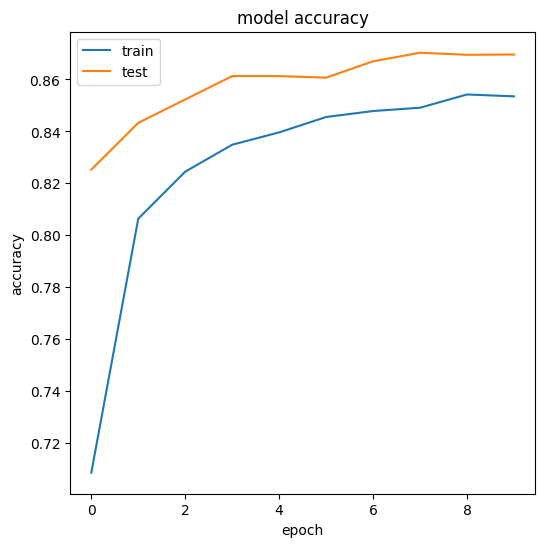

In [ ]:
plot_hist(history_1)


## **LSTM - variation 2**
* Add more LSTM layers
* Adjust learning rate from default 0.001 to 0.0001

In [ ]:
from tensorflow.keras import optimizers


Epoch 1/10
625/625 [==============================] - 228s 357ms/step - loss: 0.6870 - accuracy: 0.5401 - val_loss: 0.6291 - val_accuracy: 0.6636
Epoch 2/10
625/625 [==============================] - 222s 355ms/step - loss: 0.5880 - accuracy: 0.7016 - val_loss: 0.4811 - val_accuracy: 0.7860
Epoch 3/10
625/625 [==============================] - 223s 357ms/step - loss: 0.5314 - accuracy: 0.7465 - val_loss: 0.4426 - val_accuracy: 0.8002
Epoch 4/10
625/625 [==============================] - 222s 355ms/step - loss: 0.4994 - accuracy: 0.7643 - val_loss: 0.4167 - val_accuracy: 0.8099
Epoch 5/10
625/625 [==============================] - 221s 354ms/step - loss: 0.4780 - accuracy: 0.7742 - val_loss: 0.4081 - val_accuracy: 0.8204
Epoch 6/10
625/625 [==============================] - 219s 350ms/step - loss: 0.4624 - accuracy: 0.7850 - val_loss: 0.3974 - val_accuracy: 0.8225
Epoch 7/10
625/625 [==============================] - 221s 354ms/step - loss: 0.4514 - accuracy: 0.7908 - val_loss: 0.3798 -

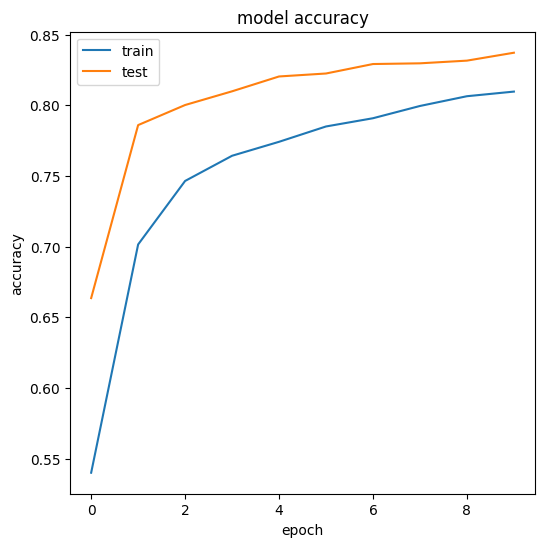

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))
# Add SpatialDropout1D to prevent overfitting
model_2.add(SpatialDropout1D(0.2))

# Add an LSTM layer
model_2.add(LSTM(32,dropout=0.2,return_sequences=True, recurrent_dropout=0.2))

# Add more LSTM layers
model_2.add(Dropout(0.2))
model_2.add(LSTM(32,dropout=0.2, recurrent_dropout=0.2))
model_2.add(Dropout(0.2))

model_2.add(Dense(32,activation="relu"))
# Add a Dense layer
model_2.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.0001)
model_2.compile(loss="binary_crossentropy",optimizer = adam,metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train,batch_size=64,epochs=10,validation_data=(X_test, y_test))

plot_hist(history_2)

## **Transformers**

### **Bert**

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming te...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
1250/1250 [==============================] - 1183s 907ms/step - loss: 0.3429 - accuracy: 0.8382 - val_loss: 0.2743 - val_accuracy: 0.8788
Epoch 2/10
1250/1250 [==============================] - 1127s 902ms/step - loss: 0.2011 - accuracy: 0.9201 - val_loss: 0.2631 - val_accuracy: 0.8943
Epoch 3/10
1250/1250 [==============================] - 1128s 902ms/step - loss: 0.1153 - accuracy: 0.9584 - val_loss: 0.3148 - val_accuracy: 0.8907
Epoch 4/10
1250/1250 [==============================] - 1128s 902ms/step - loss: 0.0652 - accuracy: 0.9780 - val_loss: 0.3873 - val_accuracy: 0.8957
Epoch 5/10
1250/1250 [==============================] - 1126s 901ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.4232 - val_accuracy: 0.8888
Epoch 6/10
1250/1250 [==============================] - 1126s 901ms/step - loss: 0.0319 - accuracy: 0.9891 - val_loss: 0.4427 - val_accuracy: 0.8903
Epoch 7/10
1250/1250 [==============================] - 1181s 945ms/step - loss: 0.0251 - accuracy: 0.9916

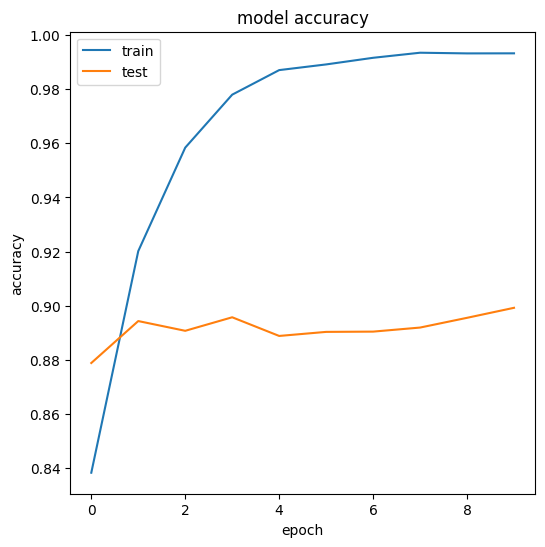

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model_bert = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize and preprocess the text data
tokenized_reviews = [tokenizer.tokenize(review) for review in df['review']]
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_reviews]
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, maxlen=128, padding='post', truncating='post')
labels = df['sentiment']

# Split data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Compile and fine-tune the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']
model_bert.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history_bert = model_bert.fit(train_inputs, train_labels, validation_data=(val_inputs, val_labels), epochs=10)

# Evaluate the fine-tuned model
loss, accuracy = model_bert.evaluate(val_inputs, val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

plot_hist(history_bert)


### **GPT-2**

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/10
2500/2500 [==============================] - 584s 224ms/step - loss: 0.4576 - accuracy: 0.7882 - val_loss: 0.4155 - val_accuracy: 0.8032
Epoch 2/10
2500/2500 [==============================] - 481s 192ms/step - loss: nan - accuracy: 0.7567 - val_loss: 0.3855 - val_accuracy: 0.8292
Epoch 3/10
2500/2500 [==============================] - 459s 184ms/step - loss: nan - accuracy: 0.6626 - val_loss: 0.3855 - val_accuracy: 0.8292
Epoch 4/10
2500/2500 [==============================] - 458s 183ms/step - loss: nan - accuracy: 0.6564 - val_loss: 0.4050 - val_accuracy: 0.8205
Epoch 5/10
2500/2500 [==============================] - 458s 183ms/step - loss: nan - accuracy: 0.6525 - val_loss: 0.4079 - val_accuracy: 0.8201
Epoch 6/10
2500/2500 [==============================] - 459s 183ms/step - loss: nan - accuracy: 0.6562 - val_loss: 0.3889 - val_accuracy: 0.8286
Epoch 7/10
2500/2500 [==============================] - 460s 184ms/step - loss: nan - accuracy: 0.7183 - val_loss: 0.4033 - val

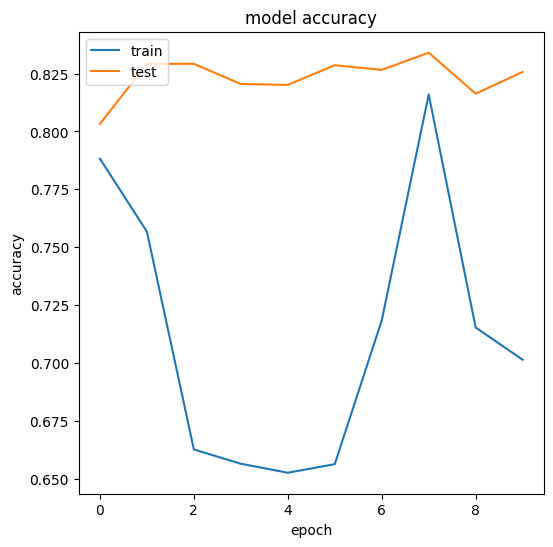

In [ ]:
from transformers import TFGPT2Model, GPT2Tokenizer

# Before building the model
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
base_model = TFGPT2Model.from_pretrained(model_name)

# Preprocessing: Encode reviews with sentiment labels and manually pad
max_length = 128  # Choose an appropriate value here
encoded_reviews = []
labels = []

for idx, row in df.iterrows():
    review = row['review']
    sentiment = row['sentiment']
    encoded_review = tokenizer.encode(review, add_special_tokens=True, max_length=max_length, truncation=True)
    encoded_reviews.append(encoded_review)
    labels.append(sentiment)

# Pad sequences to a common length
padded_encoded_reviews = tf.keras.preprocessing.sequence.pad_sequences(encoded_reviews, maxlen=max_length, padding='post', truncating='post', value=0)

# Convert lists to numpy arrays
padded_encoded_reviews = np.array(padded_encoded_reviews)
labels = np.array(labels)

# Split data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(padded_encoded_reviews, labels, test_size=0.2, random_state=42)

# Build the model using functional API
inputs = tf.keras.Input(shape=(max_length,), dtype=tf.int32)
gpt_output = base_model(inputs)[0]  # Get the output of the GPT-2 model
global_average_pooling = tf.keras.layers.GlobalAveragePooling1D()(gpt_output)
classification_output = tf.keras.layers.Dense(1, activation='sigmoid')(global_average_pooling)

classification_model = tf.keras.Model(inputs=inputs, outputs=classification_output)

# Compile the classification model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
batch_size = 16
epochs = 10
history_gpt2 = classification_model.fit(train_inputs, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_inputs, val_labels))

plot_hist(history_gpt2)



# **Result discussion and Conclusion**

About LSTM, the basic model seems performing the best and we learned following things:


*   We used  SpatialDropout1D, it can help with overfitting and improve generalization in sequence-based models. SpatialDropout1D is a dropout layer used in convolutional neural networks (CNNs) for text or sequence data. While traditional dropout randomly sets a fraction of input units to zero during training to prevent overfitting, SpatialDropout1D extends this concept to sequences by dropping entire 1D channels of features along the temporal dimension.
In a CNN, the term "spatial" usually refers to the spatial dimension of images, but in the context of text or sequences, it refers to the temporal dimension (sequence length). The primary goal of using SpatialDropout1D is to prevent overfitting by encouraging the network to learn more robust features from the input sequences.
*   We learned that Adding additional LSTM layers to a model doesn't necessarily guarantee improved performance, and there can be several reasons why doing so might not yield the desired results such as model complexity, vanishing gradient problem, data size, information loss, training time, hyperparameter tuning, etc
*   Adding additional dense layers with ReLU activation functions might not necessarily improve model performance for several reasons: Feature Saturation, Vanishing Gradient, Overfitting, etc



About transformer models:
- Using a GPT-2 model for training on the IMDb dataset might not be the best approach. GPT-2 is primarily designed for text generation tasks, and it might not perform well as a classifier out of the box. Additionally, training a large model like GPT-2 on a dataset like IMDb can be computationally intensive and might lead to issues such as numerical instability and NaN loss. For sentiment analysis tasks like IMDb reviews, it's recommended to use models that are designed specifically for classification tasks, such as BERT or other transformer-based models fine-tuned on a sentiment analysis dataset.
- Bert does perform really well, especially on training data ~99% which shows overfitting, one of the most likely reasons is Limited Data: If you have a small dataset, BERT's large number of parameters can lead to overfitting. BERT was originally pre-trained on a massive amount of text data, so when fine-tuning on a smaller dataset, it might memorize specific examples rather than learning generalizable features.